In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set style
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv ("metadata_5000.csv", low_memory=False, nrows=5000)

# Display the first few rows
df.head()


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,arxiv_id,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
0,zjufx4fo,b2897e1277f56641193a6db73825f707eed3e4c9,PMC,Sequence requirements for RNA strand transfer ...,10.1093/emboj/20.24.7220,PMC125340,11742998,unk,Nidovirus subgenomic mRNAs contain a leader se...,2001-12-17,"Pasternak, Alexander O.; van den Born, Erwin; ...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc125340?pdf=re...
1,ymceytj3,e3d0d482ebd9a8ba81c254cc433f314142e72174,PMC,"Crystal structure of murine sCEACAM1a[1,4]: a ...",10.1093/emboj/21.9.2076,PMC125375,11980704,unk,CEACAM1 is a member of the carcinoembryonic an...,2002-05-01,"Tan, Kemin; Zelus, Bruce D.; Meijers, Rob; Liu...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc125375?pdf=re...
2,wzj2glte,00b1d99e70f779eb4ede50059db469c65e8c1469,PMC,Synthesis of a novel hepatitis C virus protein...,10.1093/emboj/20.14.3840,PMC125543,11447125,no-cc,Hepatitis C virus (HCV) is an important human ...,2001-07-16,"Xu, Zhenming; Choi, Jinah; Yen, T.S.Benedict; ...",EMBO J,NaN,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
3,2sfqsfm1,cf584e00f637cbd8f1bb35f3f09f5ed07b71aeb0,PMC,Structure of coronavirus main proteinase revea...,10.1093/emboj/cdf327,PMC126080,12093723,unk,The key enzyme in coronavirus polyprotein proc...,2002-07-01,"Anand, Kanchan; Palm, Gottfried J.; Mesters, J...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc126080?pdf=re...
4,i0zym7iq,dde02f11923815e6a16a31dd6298c46b109c5dfa,PMC,Discontinuous and non-discontinuous subgenomic...,10.1093/emboj/cdf635,PMC136939,12456663,unk,"Arteri-, corona-, toro- and roniviruses are ev...",2002-12-01,"van Vliet, A.L.W.; Smits, S.L.; Rottier, P.J.M...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc136939?pdf=re...


In [2]:
print("Shape of dataset:", df.shape)
print("\nData Types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())


Shape of dataset: (5000, 19)

Data Types:
cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id             int64
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id    float64
arxiv_id            float64
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object

Missing values per column:
cord_uid               0
sha                  191
source_x               0
title                  0
doi                    0
pmcid                  0
pubmed_id              0
license                0
abstract             274
publish_time           0
authors              102
journal               28
mag_id              5000
who_covidence_id    5000
arxiv_id            5000
pdf_json_

In [3]:
# Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Extract year
df['year'] = df['publish_time'].dt.year

# Create abstract word count column
df['abstract_word_count'] = df['abstract'].astype(str).apply(lambda x: len(x.split()))


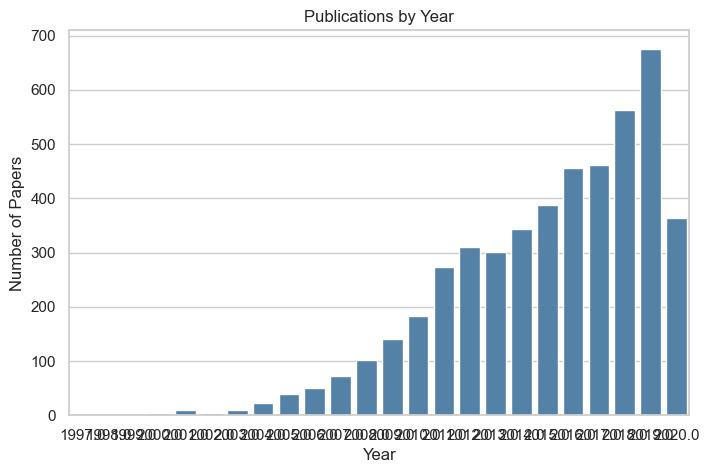

In [4]:
year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=year_counts.index, y=year_counts.values, color="steelblue")
plt.title("Publications by Year")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.show()


C:\Users\SPARROW\AppData\Local\Temp\ipykernel_6208\1152746366.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_journals.index, x=top_journals.values, palette="viridis")


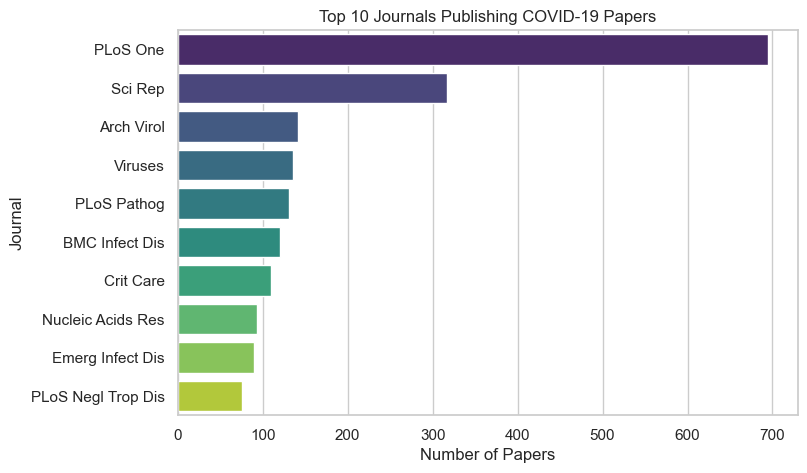

In [5]:
top_journals = df['journal'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(y=top_journals.index, x=top_journals.values, palette="viridis")
plt.title("Top 10 Journals Publishing COVID-19 Papers")
plt.xlabel("Number of Papers")
plt.ylabel("Journal")
plt.show()


C:\Users\SPARROW\AppData\Local\Temp\ipykernel_6208\2900713598.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=words_df, palette="mako")


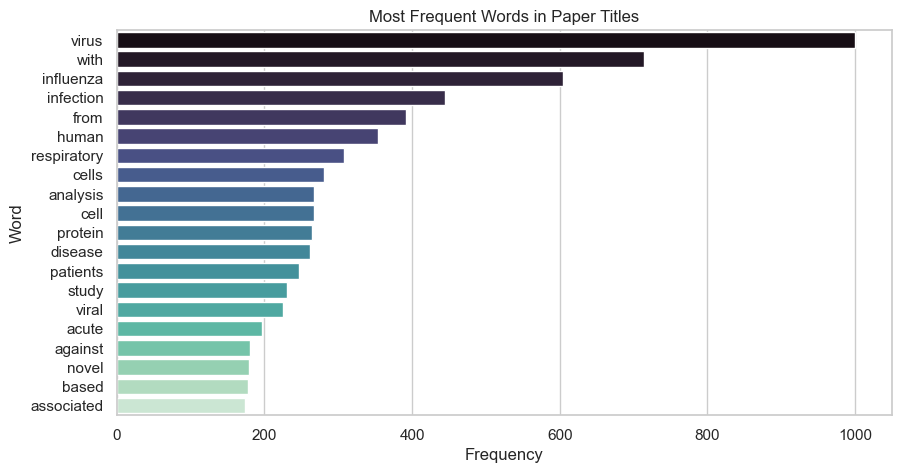

In [6]:
from collections import Counter
import re

# Simple tokenization of titles
titles = df['title'].dropna().str.lower().str.cat(sep=" ")
words = re.findall(r'\b[a-z]{4,}\b', titles)  # words with >=4 letters
common_words = Counter(words).most_common(20)

# Convert to DataFrame for plotting
words_df = pd.DataFrame(common_words, columns=['word', 'count'])

plt.figure(figsize=(10,5))
sns.barplot(x='count', y='word', data=words_df, palette="mako")
plt.title("Most Frequent Words in Paper Titles")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


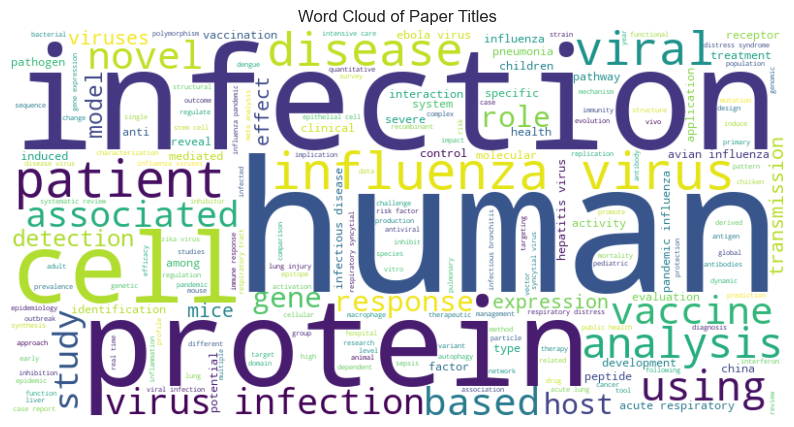

In [7]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(words))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Paper Titles")
plt.show()


C:\Users\SPARROW\AppData\Local\Temp\ipykernel_6208\3449039759.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=source_counts.index, x=source_counts.values, palette="cubehelix")


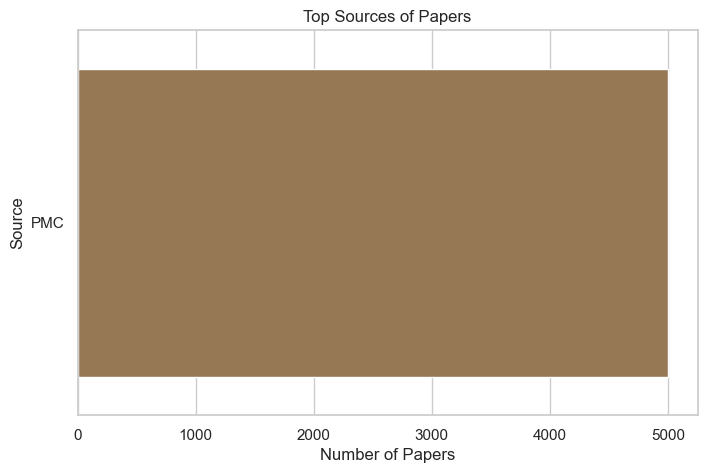

In [8]:
source_counts = df['source_x'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(y=source_counts.index, x=source_counts.values, palette="cubehelix")
plt.title("Top Sources of Papers")
plt.xlabel("Number of Papers")
plt.ylabel("Source")
plt.show()
